<a href="https://www.kaggle.com/code/josiahmathew99/supermarket-notebook?scriptVersionId=247890675" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-dataset/().xlsx


In [3]:
df = pd.read_excel("/kaggle/input/supermarket-dataset/().xlsx")
print(df.head())

          Category          City        Country  Customer Name  Manufacturer  \
0  Office Supplies       Houston  United States  Darren Powers  Message Book   
1  Office Supplies    Naperville  United States  Phillina Ober         Avery   
2  Office Supplies    Naperville  United States  Phillina Ober         SAFCO   
3  Office Supplies    Naperville  United States  Phillina Ober           GBC   
4  Office Supplies  Philadelphia  United States     Mick Brown         Avery   

  Order Date        Order ID  Postal Code  \
0 2013-01-03  CA-2011-103800        77095   
1 2013-01-04  CA-2011-112326        60540   
2 2013-01-04  CA-2011-112326        60540   
3 2013-01-04  CA-2011-112326        60540   
4 2013-01-05  CA-2011-141817        19143   

                                        Product Name   Region  ...  Ship Date  \
0  Message Book, Wirebound, Four 5 1/2" X 4" Form...  Central  ... 2013-01-07   
1                                          Avery 508  Central  ... 2013-01-08   
2    

In [4]:
df.isna().value_counts()

Category  City   Country  Customer Name  Manufacturer  Order Date  Order ID  Postal Code  Product Name  Region  Segment  Ship Date  Ship Mode  State  Sub-Category  Discount  Number of Records  Profit  Profit Ratio  Quantity  Sales
False     False  False    False          False         False       False     False        False         False   False    False      False      False  False         False     False              False   False         False     False    9994
Name: count, dtype: int64

In [5]:
# customers with 'Brown' in their names
brown = df[df['Customer Name'].str.contains('Brown', case = False, na = False)]
brown.head(10)

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,2013-01-12,Standard Class,Pennsylvania,Art,0.2,1,$5,0.25,3,$20
734,Office Supplies,Phoenix,United States,Philip Brown,Eldon,2013-07-14,US-2011-150532,85023,Eldon Fold 'N Roll Cart System,West,...,2013-07-21,Standard Class,Arizona,Storage,0.2,1,$6,0.11,5,$56
854,Technology,New York City,United States,Trudy Brown,Logitech,2013-08-06,CA-2011-137575,10035,Logitech G700s Rechargeable Gaming Mouse,East,...,2013-08-11,Standard Class,New York,Accessories,0.0,1,$84,0.42,2,$200
1142,Furniture,Chicago,United States,Sarah Brown,Bush,2013-09-20,CA-2011-120411,60653,Bush Heritage Pine Collection 5-Shelf Bookcase...,Central,...,2013-09-23,First Class,Illinois,Bookcases,0.3,1,-$70,-0.14,5,$493
1143,Technology,Chicago,United States,Sarah Brown,Other,2013-09-20,CA-2011-120411,60653,QVS USB Car Charger 2-Port 2.1Amp for iPod/iPh...,Central,...,2013-09-23,First Class,Illinois,Phones,0.2,1,$3,0.31,2,$11
1450,Technology,Los Angeles,United States,William Brown,Polycom,2013-11-04,CA-2011-125829,90045,Polycom SoundPoint Pro SE-225 Corded phone,West,...,2013-11-11,Standard Class,California,Phones,0.2,1,$67,0.10,7,$666
1451,Furniture,Los Angeles,United States,William Brown,Bevis,2013-11-04,CA-2011-125829,90045,"Bevis Round Conference Table Top, X-Base",West,...,2013-11-11,Standard Class,California,Tables,0.2,1,-$65,-0.11,4,$574
1452,Office Supplies,Los Angeles,United States,William Brown,Cardinal,2013-11-04,CA-2011-125829,90045,Cardinal EasyOpen D-Ring Binders,West,...,2013-11-11,Standard Class,California,Binders,0.2,1,$8,0.38,3,$22
1453,Office Supplies,Los Angeles,United States,William Brown,Xerox,2013-11-04,CA-2011-125829,90045,Xerox 2000,West,...,2013-11-11,Standard Class,California,Paper,0.0,1,$9,0.48,3,$19
1454,Technology,Los Angeles,United States,William Brown,Hewlett-Packard,2013-11-04,CA-2011-125829,90045,Hewlett-Packard Deskjet D4360 Printer,West,...,2013-11-11,Standard Class,California,Machines,0.2,1,$140,0.31,4,$448


In [6]:
# category with the highest order
category_count = df['Category'].value_counts().head().reset_index(name='Order_Count')
category_count

,Category,Order_Count
0,Office Supplies,6026
1,Furniture,2121
2,Technology,1847


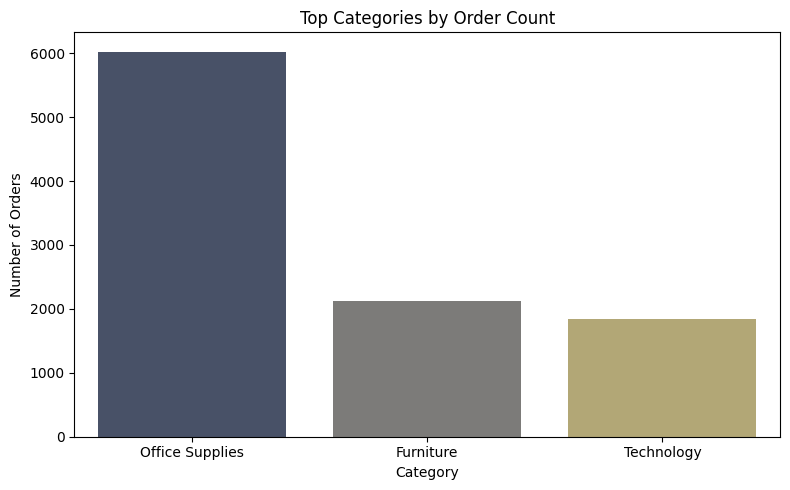

In [7]:
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Order_Count', data = category_count, palette='cividis')

plt.title('Top Categories by Order Count')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [8]:
# converting sales column from string to float
df['Sales'] = df['Sales'].replace('[\$,]', '', regex = True).astype(float)

# Top cities with the highest sales
top_sales_cities = df.groupby('City')['Sales'].sum().sort_values(ascending = False).rename('Sales').reset_index(name='Total Sales').head(10)
top_sales_cities

,City,Total Sales
0,New York City,256397.0
1,Los Angeles,175857.0
2,Seattle,119552.0
3,San Francisco,112690.0
4,Philadelphia,109085.0
5,Houston,64504.0
6,Chicago,48540.0
7,San Diego,47521.0
8,Jacksonville,44712.0
9,Springfield,43052.0


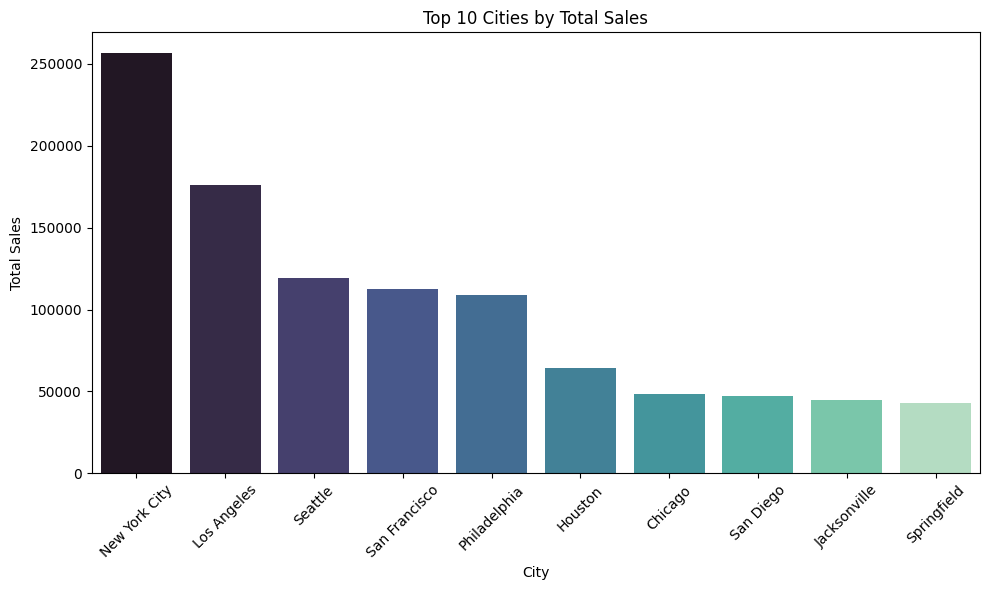

In [9]:
# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_sales_cities, x='City', y='Total Sales', palette='mako')

plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# top manufacturers with the most orders
top_manufacturer = df['Manufacturer'].value_counts().head().reset_index(name='Total Order')
top_manufacturer

,Manufacturer,Total Order
0,Other,1893
1,Xerox,859
2,Avery,557
3,GBC,332
4,Global,291


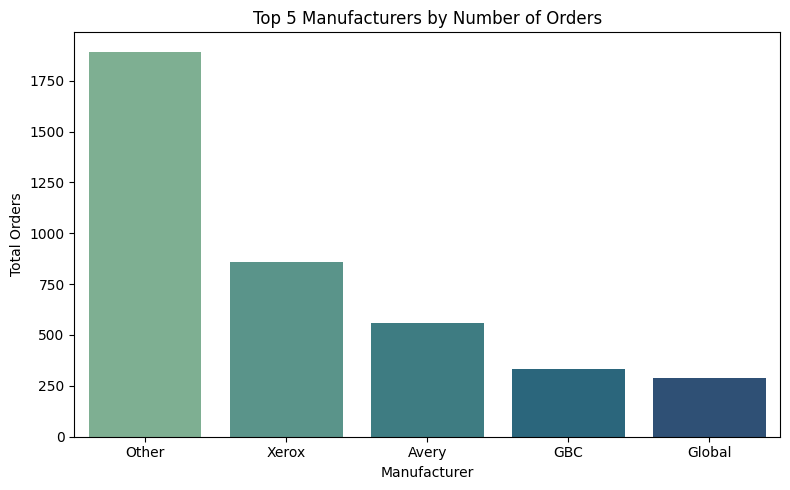

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_manufacturer, x='Manufacturer', y='Total Order', palette='crest')
plt.title('Top 5 Manufacturers by Number of Orders')
plt.xlabel('Manufacturer')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [12]:
# number of unique customers
unique_customers = df['Customer Name'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 793


In [13]:
# ensure column is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
# sales per year
df['Order Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index(name='Total Sales')
# sales per month
df['Order Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index(name='Total Sales')
# sales per day
df['Order Day'] = df['Order Date'].dt.day
daily_sales = df.groupby('Order Day')['Sales'].sum().reset_index(name='Total Sales')

print("Yearly sales:\n", yearly_sales, "\n")
print("Monthly sales:\n", monthly_sales, "\n")
print("Daily sales:\n", daily_sales)

Yearly sales:
    Order Year  Total Sales
0        2013     484255.0
1        2014     470560.0
2        2015     608523.0
3        2016     734016.0 

Monthly sales:
     Order Month  Total Sales
0             1      95666.0
1             2      59646.0
2             3     204487.0
3             4     138273.0
4             5     154740.0
5             6     151818.0
6             7     146421.0
7             8     161207.0
8             9     307187.0
9            10     197108.0
10           11     355262.0
11           12     325539.0 

Daily sales:
     Order Day  Total Sales
0           1      78734.0
1           2      95923.0
2           3      83123.0
3           4      73178.0
4           5      63793.0
5           6      58670.0
6           7      59925.0
7           8      98889.0
8           9      78434.0
9          10      50281.0
10         11      70812.0
11         12      66117.0
12         13      77108.0
13         14      77576.0
14         15      58325.0
15     

In [14]:
df

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,...,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Order Year,Order Month,Order Day
0,Office Supplies,Houston,United States,Darren Powers,Message Book,2013-01-03,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,...,Paper,0.2,1,$6,0.34,2,16.0,2013,1,3
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,2013-01-04,CA-2011-112326,60540,Avery 508,Central,...,Labels,0.2,1,$4,0.36,3,12.0,2013,1,4
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,2013-01-04,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,...,Storage,0.2,1,-$65,-0.24,3,273.0,2013,1,4
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,2013-01-04,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,...,Binders,0.8,1,-$5,-1.55,2,4.0,2013,1,4
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,...,Art,0.2,1,$5,0.25,3,20.0,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,New York City,United States,Patrick O'Donnell,Other,2016-12-30,CA-2014-143259,10009,Gear Head AU3700S Headset,East,...,Phones,0.0,1,$3,0.03,7,91.0,2016,12,30
9990,Office Supplies,New York City,United States,Patrick O'Donnell,Wilson Jones,2016-12-30,CA-2014-143259,10009,Wilson Jones Legal Size Ring Binders,East,...,Binders,0.2,1,$20,0.38,3,53.0,2016,12,30
9991,Office Supplies,Fairfield,United States,Erica Bern,Cardinal,2016-12-30,CA-2014-115427,94533,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",West,...,Binders,0.2,1,$5,0.33,2,14.0,2016,12,30
9992,Office Supplies,Fairfield,United States,Erica Bern,GBC,2016-12-30,CA-2014-115427,94533,GBC Binding covers,West,...,Binders,0.2,1,$6,0.31,2,21.0,2016,12,30


In [15]:
#days with highest placed orders
top_order_days = df['Order Day'].value_counts().head(10).reset_index(name='Orders')
top_order_days

,Order Day,Orders
0,21,399
1,20,398
2,2,393
3,9,378
4,11,366
5,5,355
6,13,350
7,3,350
8,18,342
9,23,339


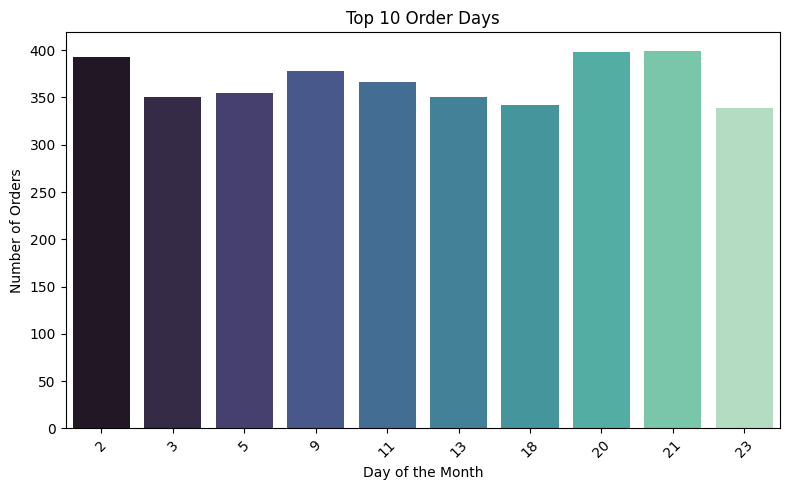

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_order_days.sort_values(by = 'Orders'), x='Order Day', y='Orders', palette='mako')
plt.title('Top 10 Order Days')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# convert profit to  numeric
df['Profit'] = df['Profit'].replace('[\$,]', '', regex = True).astype(float)

# extract quarter from order date
df['Order Quarter'] = df['Order Date'].dt.quarter

# calculate average profit per quarter
quarterly_profit = df.groupby('Order Quarter')['Profit'].mean().round(2).sort_values(ascending = False).reset_index(name='Average Profit')
quarterly_profit

,Order Quarter,Average Profit
0,1,34.83
1,4,29.92
2,3,25.99
3,2,25.93


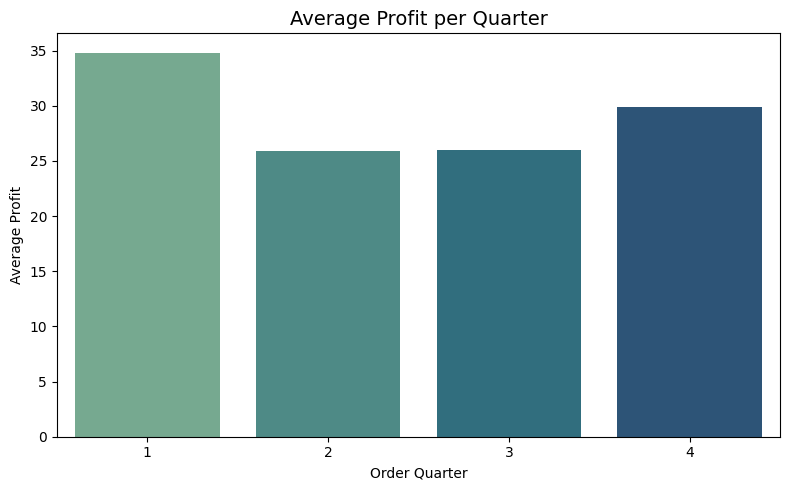

In [18]:
# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=quarterly_profit, x='Order Quarter', y='Average Profit', palette='crest')

# Customize chart
plt.title('Average Profit per Quarter', fontsize=14)
plt.xlabel('Order Quarter')
plt.ylabel('Average Profit')
plt.tight_layout()
plt.show()

In [19]:
# calculate average discount per category
avg_discount = df.groupby('Category')['Discount'].mean().round(2).sort_values(ascending = False).reset_index(name='Average Discount')
avg_discount

,Category,Average Discount
0,Furniture,0.17
1,Office Supplies,0.16
2,Technology,0.13


In [20]:
# total profits by states
state_total_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).reset_index(name='Total Profit')
state_total_profit

,State,Total Profit
0,California,76368.0
1,New York,74020.0
2,Washington,33390.0
3,Michigan,24458.0
4,Virginia,18600.0
5,Indiana,18382.0
6,Georgia,16247.0
7,Kentucky,11202.0
8,Minnesota,10828.0
9,Delaware,9979.0


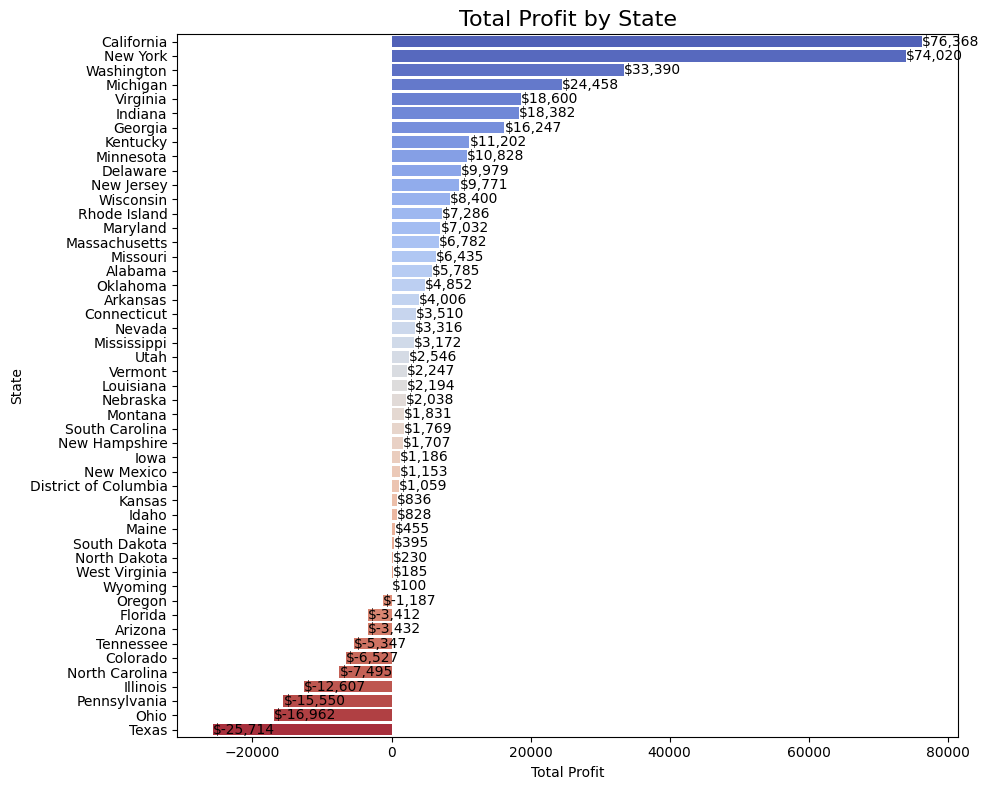

In [21]:
plt.figure(figsize=(10, 8))

# Barplot
sns.barplot(data=state_total_profit, y='State', x='Total Profit', palette='coolwarm')

# Add title and labels
plt.title('Total Profit by State', fontsize=16)
plt.xlabel('Total Profit')
plt.ylabel('State')

# Add profit values on bars
for index, value in enumerate(state_total_profit['Total Profit']):
    plt.text(x=value, y=index, s=f"${value:,.0f}", va='center')

plt.tight_layout()
plt.show()

In [22]:
# correlation between discount and profit
correlation = df[['Discount', 'Profit']].corr()
correlation

,Discount,Profit
Discount,1.000000,-0.219497
Profit,-0.219497,1.000000


In [23]:
correlation = df['Discount'].corr(df['Profit'])
print(f"Correlation between Discount and Profit: {correlation}")

Correlation between Discount and Profit: -0.21949697193406992


In [24]:
# most frequently purchased sub-categories, top 5
freq_pur_subcats = df['Sub-Category'].value_counts().head(5).reset_index(name='Frequency')
freq_pur_subcats

,Sub-Category,Frequency
0,Binders,1523
1,Paper,1370
2,Furnishings,957
3,Phones,889
4,Storage,846


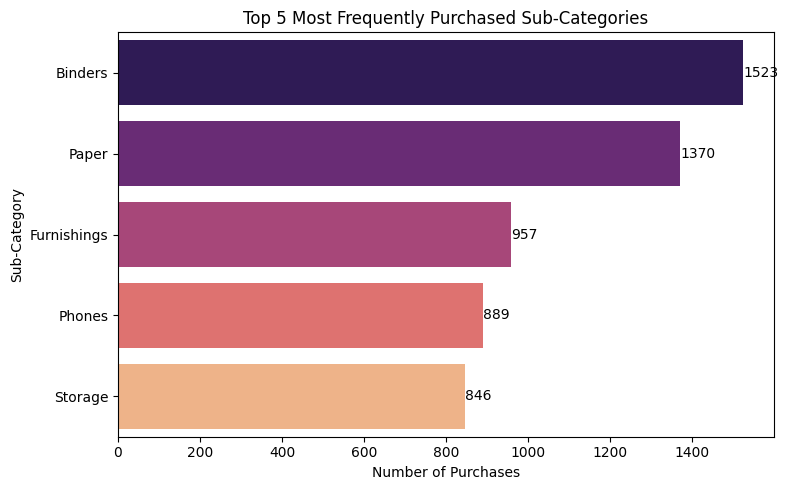

In [25]:
# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(
    data=freq_pur_subcats,
    y='Sub-Category',
    x='Frequency',
    palette='magma'
)

# Add labels to the bars
for index, row in freq_pur_subcats.iterrows():
    plt.text(row['Frequency'] + 1, index, row['Frequency'], va='center')

plt.title('Top 5 Most Frequently Purchased Sub-Categories')
plt.xlabel('Number of Purchases')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()

In [26]:
# quantity sold by region
quantity_region = df.groupby('Region')['Quantity'].sum().sort_values(ascending = False).reset_index(name='Quantity Sold')
quantity_region

,Region,Quantity Sold
0,West,12266
1,East,10618
2,Central,8780
3,South,6209


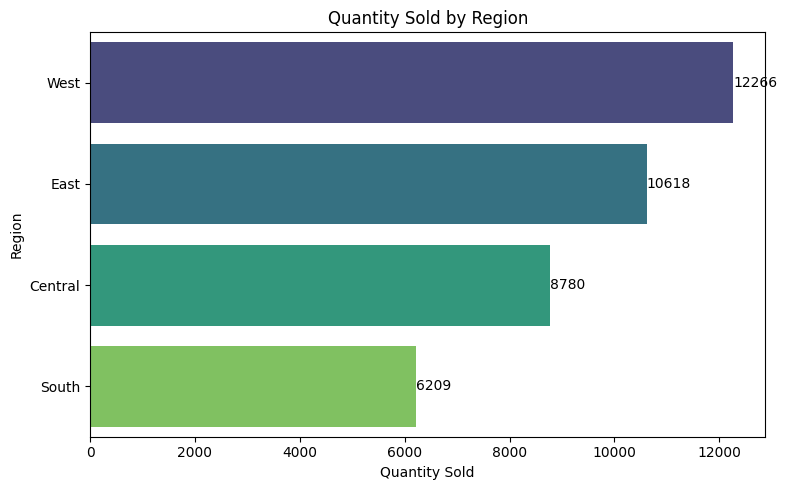

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(data=quantity_region, y='Region', x='Quantity Sold', palette='viridis')

# Add data labels
for index, value in enumerate(quantity_region['Quantity Sold']):
    plt.text(value + 1, index, str(value), va='center')

plt.title('Quantity Sold by Region')
plt.xlabel('Quantity Sold')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [28]:
# sales and profit of each category
category_s_p = df.groupby('Category')[['Sales','Profit']].sum().sort_values(by = 'Sales', ascending = False).reset_index()
category_s_p

,Category,Sales,Profit
0,Technology,836221.0,145429.0
1,Furniture,742006.0,18444.0
2,Office Supplies,719127.0,122474.0


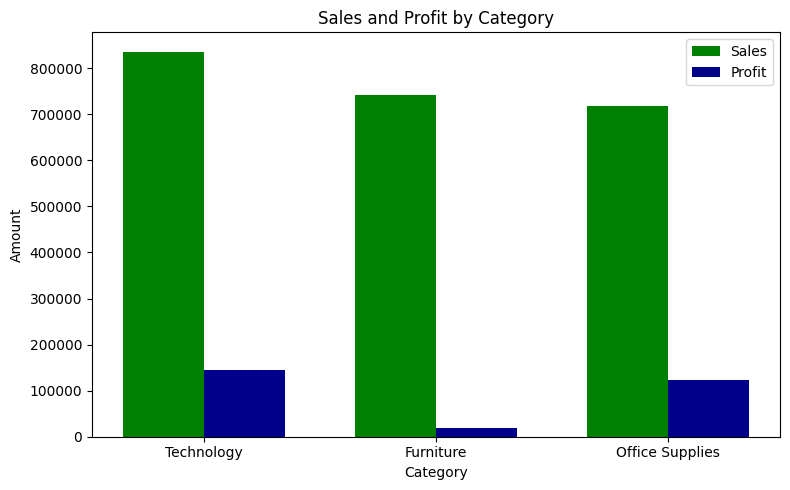

In [29]:
x = np.arange(len(category_s_p['Category']))
width = 0.35  # Width of bars

# Plot
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, category_s_p['Sales'], width, label='Sales', color='green')
plt.bar(x + width/2, category_s_p['Profit'], width, label='Profit', color='darkblue')

# Labels and ticks
plt.xticks(x, category_s_p['Category'])
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Sales and Profit by Category')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# cities that contribute most to overall sales by region
city_sales = df.groupby(['City', 'Region'])['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False).head(10)
city_sales

,City,Region,Sales
367,New York City,East,256397.0
300,Los Angeles,West,175857.0
498,Seattle,West,119552.0
484,San Francisco,West,112690.0
415,Philadelphia,East,109085.0
232,Houston,Central,64504.0
89,Chicago,Central,48540.0
483,San Diego,West,47521.0
243,Jacksonville,South,44712.0
141,Detroit,Central,42453.0


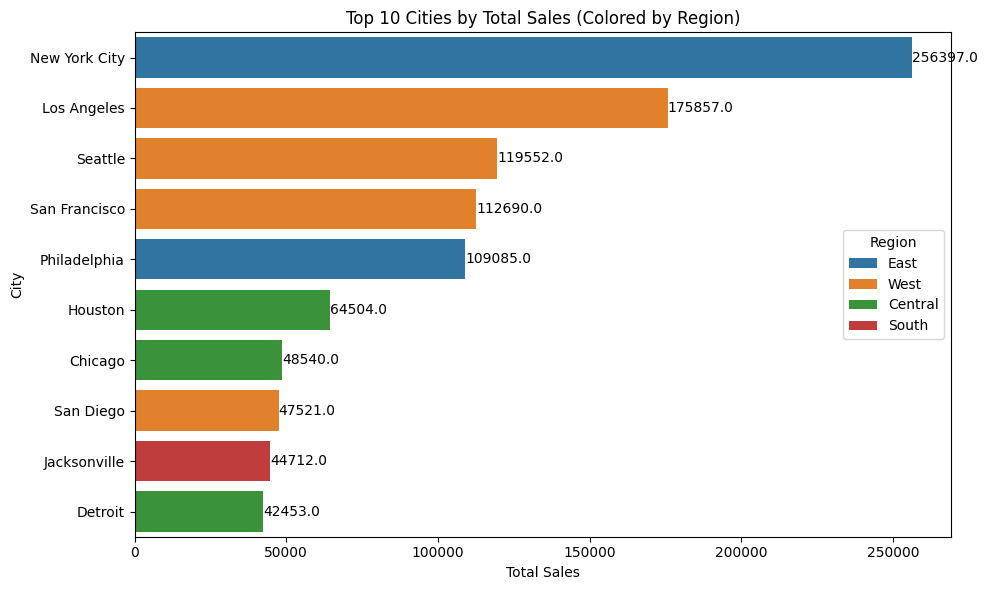

In [31]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=city_sales, y='City', x='Sales', hue='Region', dodge=False)
# Add data labels
for index, value in enumerate(city_sales['Sales']):
    plt.text(value + 1, index, str(value), va='center')
    
plt.title('Top 10 Cities by Total Sales (Colored by Region)')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.tight_layout()
plt.show()

In [32]:
# customer segments(category & region) that yield the highest profit margins
segment_profit_margin = (
    df.groupby(['Category', 'Region'])
    .agg(Total_Profit=('Profit', 'sum'), Total_Sales=('Sales', 'sum')).reset_index()
)
segment_profit_margin['Profit_Margin'] = segment_profit_margin['Total_Profit'] / segment_profit_margin['Total_Sales']

segment_profit_margin_sorted = segment_profit_margin.round(2).sort_values(by='Profit_Margin', ascending=False)

In [33]:
segment_profit_margin_sorted

,Category,Region,Total_Profit,Total_Sales,Profit_Margin
7,Office Supplies,West,52596.0,220881.0,0.24
5,Office Supplies,East,41012.0,205549.0,0.20
8,Technology,Central,33691.0,170432.0,0.20
9,Technology,East,47459.0,264994.0,0.18
11,Technology,West,44294.0,252013.0,0.18
6,Office Supplies,South,19971.0,125662.0,0.16
10,Technology,South,19985.0,148782.0,0.13
2,Furniture,South,6765.0,117306.0,0.06
3,Furniture,West,11496.0,252620.0,0.05
4,Office Supplies,Central,8895.0,167035.0,0.05


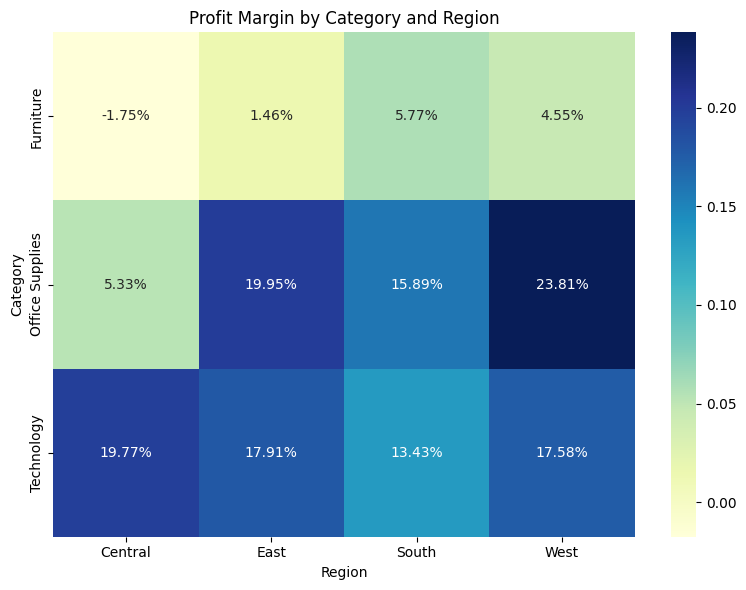

In [34]:
pivot_margin = segment_profit_margin.pivot(index='Category', columns='Region', values='Profit_Margin')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_margin, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title("Profit Margin by Category and Region")
plt.ylabel("Category")
plt.xlabel("Region")
plt.tight_layout()
plt.show()

In [35]:
# How discount rates affect total sales and profit
discount_summary = df.groupby('Discount').agg(Total_Sales = ('Sales', 'sum'), Total_Profit = ('Profit', 'sum'), Count = ('Discount', 'count')).reset_index()

In [36]:
discount_summary

,Discount,Total_Sales,Total_Profit,Count
0,0.00,1088020.0,320946.0,4798
1,0.10,54376.0,9025.0,94
2,0.15,27560.0,1416.0,52
3,0.20,764636.0,90344.0,3657
4,0.30,103210.0,-10362.0,227
5,0.32,14491.0,-2390.0,27
6,0.40,116428.0,-23052.0,206
7,0.45,5485.0,-2493.0,11
8,0.50,58912.0,-20508.0,66
9,0.60,6649.0,-5944.0,138


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

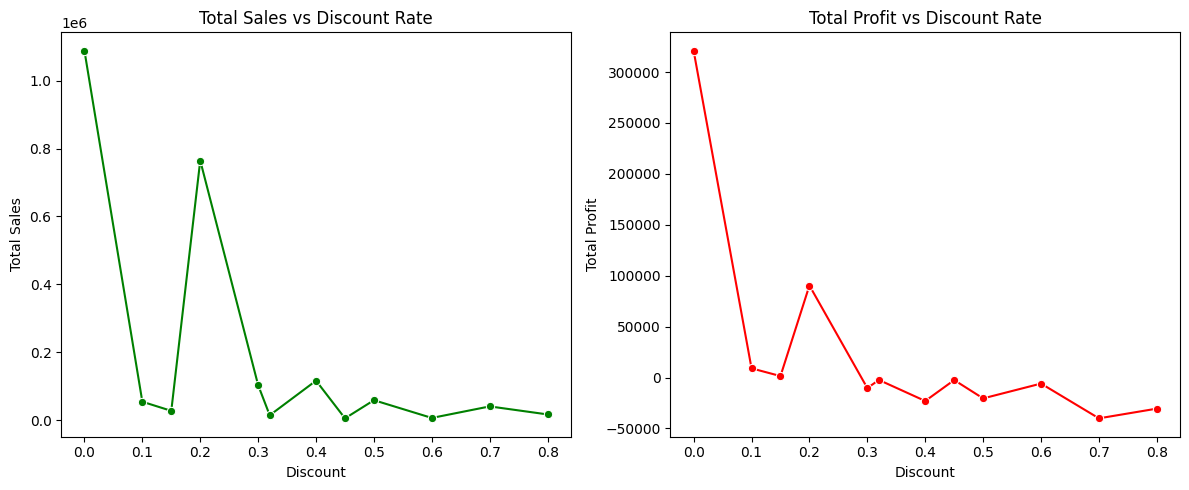

In [37]:
plt.figure(figsize = (12, 5))

# Sales
plt.subplot(1, 2, 1)
sns.lineplot(data = discount_summary, x = 'Discount', y = 'Total_Sales', marker = 'o', color = 'green')
plt.title("Total Sales vs Discount Rate")
plt.xlabel("Discount")
plt.ylabel("Total Sales")

# Profit
plt.subplot(1, 2, 2)
sns.lineplot(data = discount_summary, x = 'Discount', y = 'Total_Profit', marker = 'o', color = 'red')
plt.title("Total Profit vs Discount Rate")
plt.xlabel("Discount")
plt.ylabel("Total Profit")

plt.tight_layout()
plt.show()

In [38]:
#  calculating delivery days and how it varies across regions/ states
df['Delivery_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [39]:
region_delivery = df.groupby('Region')['Delivery_Days'].mean().round(2).reset_index()
state_delivery = df.groupby('State')['Delivery_Days'].mean().round(2).reset_index()

In [40]:
region_delivery

,Region,Delivery_Days
0,Central,4.06
1,East,3.91
2,South,3.96
3,West,3.93


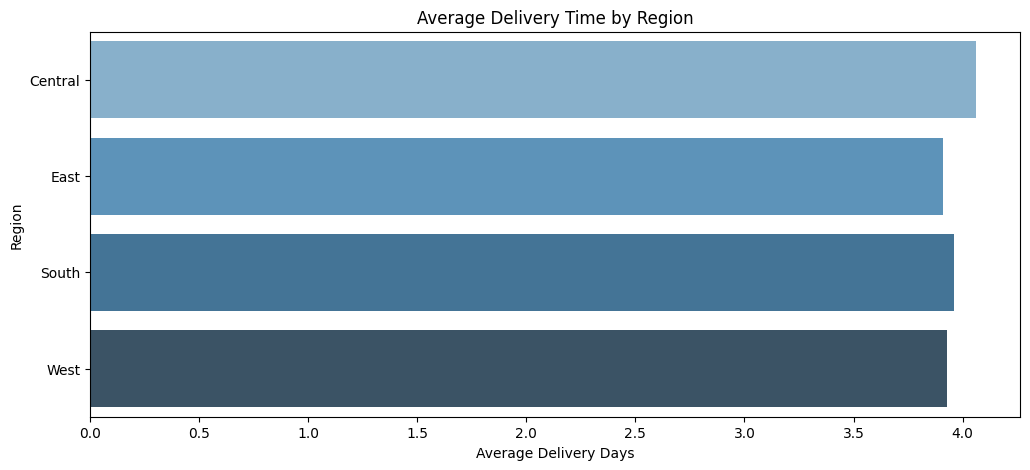

In [41]:
plt.figure(figsize = (12, 5))
sns.barplot(data = region_delivery, x = 'Delivery_Days', y = 'Region', palette = 'Blues_d')
plt.title("Average Delivery Time by Region")
plt.xlabel("Average Delivery Days")
plt.ylabel("Region")
plt.show()

In [42]:
state_delivery

,State,Delivery_Days
0,Alabama,4.11
1,Arizona,4.07
2,Arkansas,4.13
3,California,3.87
4,Colorado,3.68
5,Connecticut,3.60
6,Delaware,4.27
7,District of Columbia,5.70
8,Florida,3.95
9,Georgia,3.84


In [43]:
df['Delivery_Days'].unique()

array([4, 7, 2, 1, 5, 3, 6, 0])

In [44]:
# categories by profit
categories_profit = df.groupby('Category').agg(Total_profit = ('Profit', 'sum')).sort_values(by = 'Total_profit', ascending = False).reset_index()
categories_profit

,Category,Total_profit
0,Technology,145429.0
1,Office Supplies,122474.0
2,Furniture,18444.0


Text(0, 0.5, 'Category')

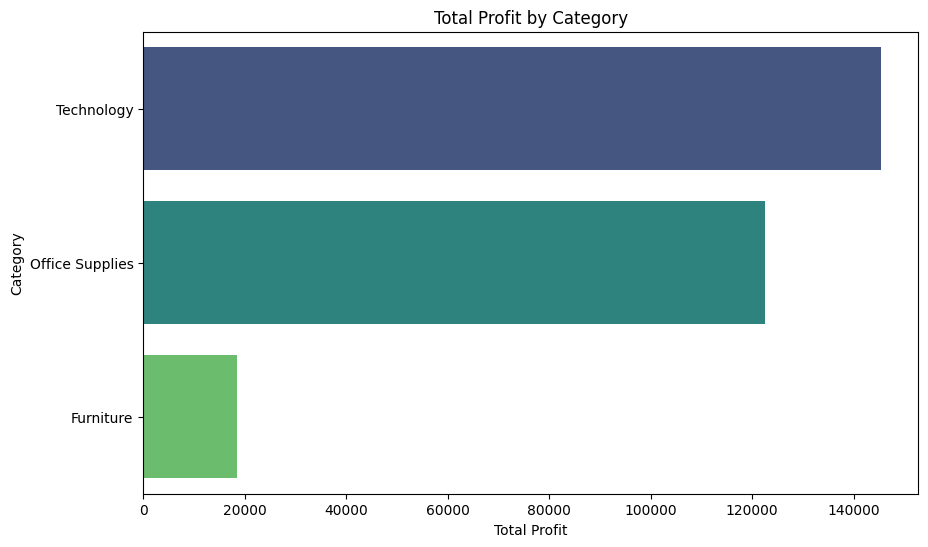

In [45]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=categories_profit,
    y='Category',
    x='Total_profit',
    palette='viridis'
)

plt.title('Total Profit by Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')

In [46]:
# sub-categories by profit
sub_categories_profit = df.groupby('Sub-Category').agg(Total_profit = ('Profit', 'sum')).sort_values(by = 'Total_profit', ascending = False).reset_index()
sub_categories_profit

,Sub-Category,Total_profit
0,Copiers,55618.0
1,Phones,44492.0
2,Accessories,41932.0
3,Paper,34053.0
4,Binders,30200.0
5,Chairs,26586.0
6,Storage,21280.0
7,Appliances,18132.0
8,Furnishings,13070.0
9,Envelopes,6956.0


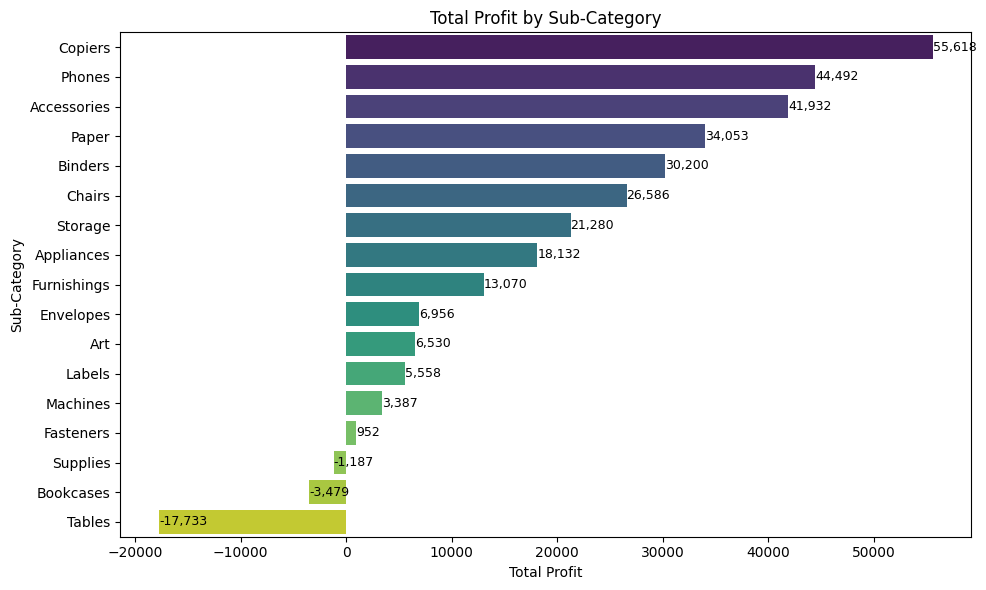

In [47]:
# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=sub_categories_profit,
    y='Sub-Category',
    x='Total_profit',
    palette='viridis'
)

plt.title('Total Profit by Sub-Category')
plt.xlabel('Total Profit')
plt.ylabel('Sub-Category')

# Add labels in front of bars
for i, value in enumerate(sub_categories_profit['Total_profit']):
    plt.text(value, i, f'{value:,.0f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

In [48]:
# Sales by region
region_sales = df.groupby('Region')['Sales'].mean().round(2).sort_values(ascending = False)
region_sales

Region
South      241.82
East       238.35
West       226.51
Central    215.78
Name: Sales, dtype: float64

In [49]:
# products with the most quantity sold
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending = False).head(10)
top_products

Product Name
Staples                                                       215
Staple envelope                                               170
Easy-staple paper                                             150
Staples in misc. colors                                        86
KI Adjustable-Height Table                                     74
Avery Non-Stick Binders                                        71
Storex Dura Pro Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Staple-based wall hangings                                     62
Name: Quantity, dtype: int64

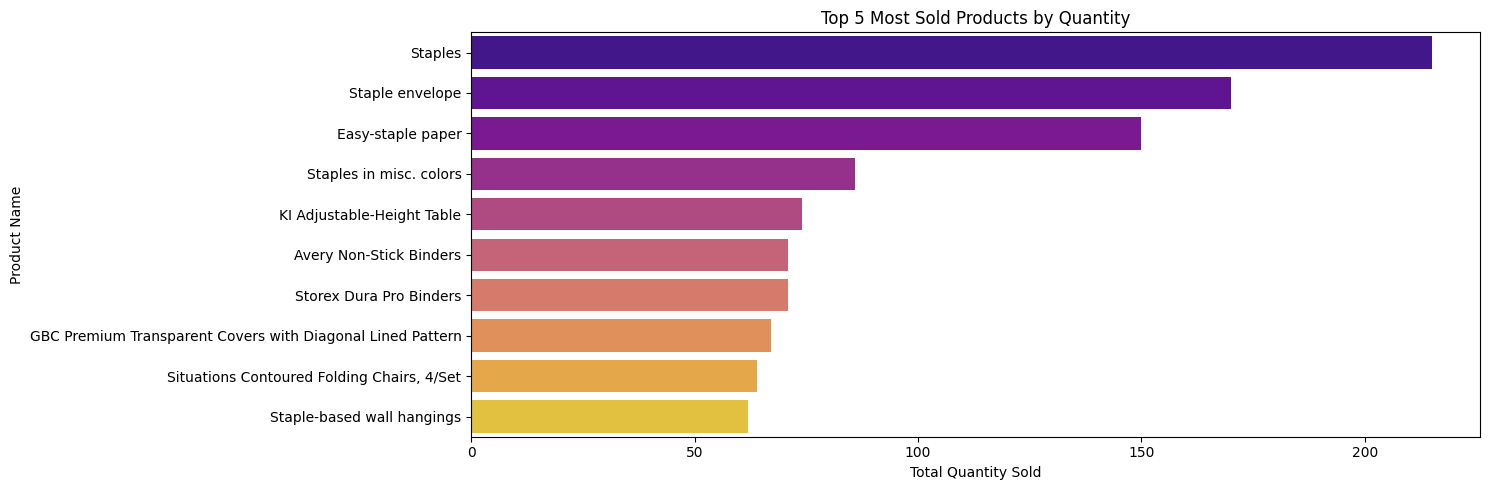

In [50]:
# Visualize
plt.figure(figsize=(15,5))
sns.barplot(x = top_products.values, y = top_products.index, palette = 'plasma')
plt.title('Top 5 Most Sold Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [51]:
# top 10 produccts generating the most profit
top_profit_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending = False).head(10)
top_profit_products

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25200.0
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7751.0
Hewlett Packard LaserJet 3310 Copier                                            6984.0
Canon PC1060 Personal Laser Copier                                              4571.0
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4095.0
Ativa V4110MDD Micro-Cut Shredder                                               3773.0
3D Systems Cube Printer, 2nd Generation, Magenta                                3718.0
Plantronics Savi W720 Multi-Device Wireless Headset System                      3697.0
Ibico EPK-21 Electric Binding System                                            3345.0
Zebra ZM400 Thermal Label Printer                                               3344.0
Name: Profit, dtype: float64

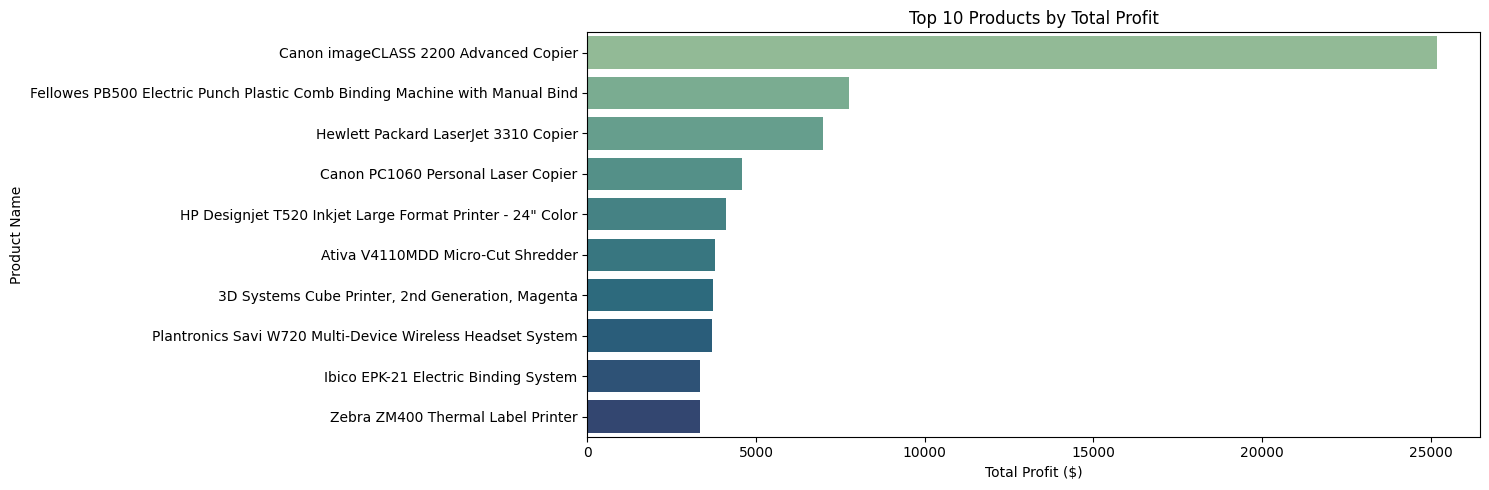

In [52]:
# Visualize
plt.figure(figsize = (15,5))
sns.barplot(x = top_profit_products.values, y = top_profit_products.index, palette = 'crest')
plt.title('Top 10 Products by Total Profit')
plt.xlabel('Total Profit ($)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

In [53]:
# states with the highest and lowest profit
state_profit = df.groupby('State')['Profit'].sum().sort_values()

# Lowest profit state
lowest_profit_state = state_profit.head(1)
print("Lowest Profit State:\n", lowest_profit_state, "\n")

# Highest profit state
highest_profit_state = state_profit.tail(1)
print("Highest Profit State:\n", highest_profit_state)


Lowest Profit State:
 State
Texas   -25714.0
Name: Profit, dtype: float64 

Highest Profit State:
 State
California    76368.0
Name: Profit, dtype: float64


In [54]:
df.columns

Index(['Category', 'City', 'Country', 'Customer Name', 'Manufacturer',
       'Order Date', 'Order ID', 'Postal Code', 'Product Name', 'Region',
       'Segment', 'Ship Date', 'Ship Mode', 'State', 'Sub-Category',
       'Discount', 'Number of Records', 'Profit', 'Profit Ratio', 'Quantity',
       'Sales', 'Order Year', 'Order Month', 'Order Day', 'Order Quarter',
       'Delivery_Days'],
      dtype='object')